<a href="https://colab.research.google.com/github/Rogerio-mack/IMT_CD_2024/blob/main/IMT_Distribuicoes_Inferencia_IC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="ITM">
</head>

<img src="https://maua.br/images/selo-60-anos-maua.svg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# **Distribuições, Inferência e Testes Estatísticos**

Como fazer inferências, trabalhar poucos dados, concluir a diferença de médias de dados e dependências entre variáveis? Esses são alguns tópicos que trataremos aqui.

<br>

>> *Inferência estatística é o processo pelo qual se tira conclusões sobre uma população com base em uma amostra extraída dessa população. Envolve a estimativa de parâmetros da população, a construção de intervalos de confiança para esses parâmetros e a realização de testes de hipóteses.*

**Montgomery, D. C., & Runger, G. C. (2010). Applied Statistics and Probability for Engineers.**

<br>

>> *Inferência estatística refere-se ao conjunto de métodos usados para fazer afirmações gerais sobre uma população com base em dados amostrais. Esses métodos incluem a estimativa de parâmetros populacionais e a avaliação da validade das hipóteses formuladas sobre a população.*

**Rice, J. A. (2006). Mathematical Statistics and Data Analysis.**

# **WARM-UP**

# Exercício 1

Faça um script para gerar séries randômicas de valores e gere um gráfico de distribuição dos valores. Qual o tipo de distribuição desses dados? Experimente séries de valores 100, 1000, 10000, 100000 valores.


# Exercício 2

Faça um script para gerar a média (100 médias) de 100 séries como acima (de 100 valores randômicos). Qual a distribuição dessas médias de valores?

> **O Teorema Central do Limite (TCL)** A soma de $N$ variáveis aleatórias independentes $X$, com qualquer distribuição e variâncias semelhantes, é uma variável com distribuição que se aproxima da distribuição normal quando $N$ aumenta.




# Exercício 3 (Explore)

* [NetFlix, What is an A/B Test?](https://netflixtechblog.com/what-is-an-a-b-test-b08cc1b57962)

* [Outros Exemplos](https://www.datacamp.com/blog/data-demystified-what-is-a-b-testing)

## Testes de Hipóteses: Paramétricos $\times$ Não Paramétricos

Testes Paramétricos assumem uma distribuição normal dos dados (ou alguma outra distribuição específica) requerendo outros pressupostos, como variância constante, mas têm poder estatístico maior quando os pressupostos são atendidos. Já os Testes Não Paramétricos, não assumem distribuição específica dos dados, são mais flexíveis e robustos, mas geralmente têm menor poder estatístico.

* **Testes Paramétricos** $\longrightarrow$ Distribuição normal, variância constante, grandes amostras, valores contínuos.
* **Testes Não Paramétricos** $\longrightarrow$ Distribuição desconhecida ou não normal, pequenas amostras, valores ordinais ou categóricos ,grande presença de *outliers*

**Cuidado: usar teste paramétricos violando os pressupostos pode levar a resultados e conclusões erradas! O cálculo sempre pode ser feito, mas a interpretação e adequação do teste está com você!**

<br>
<br>

# Distribuições Teóricas (Normal)

Vamos começar explorando a distribuição normal.





## `rvs(loc=0, scale=1, size=1, random_state=None)`

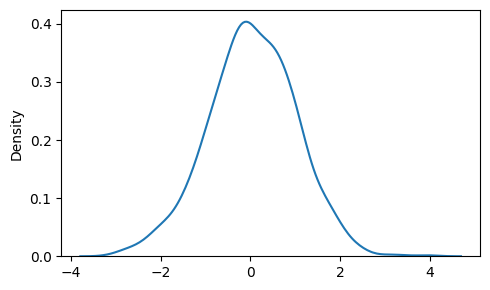

In [ ]:
from scipy.stats import norm
values = norm.rvs(loc=0,scale=1,size=1000,random_state=1)

fig, ax = plt.subplots(1,1)

sns.kdeplot(x=values,ax=ax)

plt.tight_layout()
plt.show()

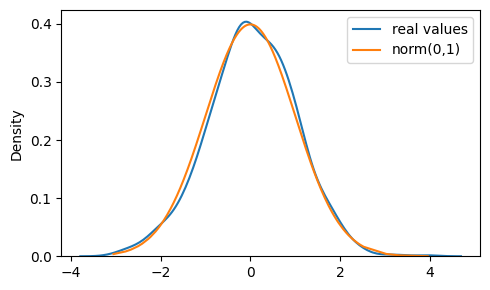

In [ ]:
values = norm.rvs(loc=0,scale=1,size=1000,random_state=1)

fig, ax = plt.subplots(1,1)

sns.kdeplot(x=values,ax=ax,label='real values')

values_norm = []
for v in values:
    values_norm.append(norm.pdf(v,loc=0,scale=1))

values_norm = np.array(values_norm)

sns.lineplot(x=values, y=values_norm, ax=ax, label='norm(0,1)')

plt.legend()
plt.tight_layout()
plt.show()

## Diferentes médias e dispersão dos dados

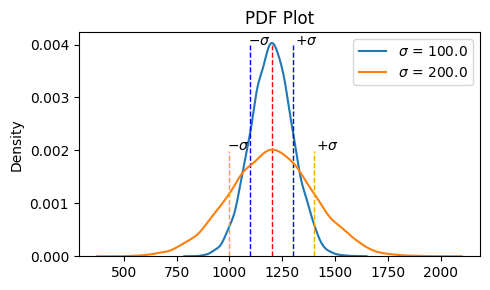

In [ ]:
fig, ax = plt.subplots(1,1)

values = norm.rvs(loc=1200,scale=100,size=10000,random_state=1)
sns.kdeplot(values,ax=ax,label='$\\sigma$ = ' + str(np.round(values.std(),0)))
ax.vlines(1200-values.std(),0,norm.pdf(1200,loc=1200,scale=100),linestyle='--',color='b',lw=1)
ax.vlines(1200+values.std(),0,norm.pdf(1200,loc=1200,scale=100),linestyle='--',color='b',lw=1)
ax.vlines(1200,0,norm.pdf(1200,loc=1200,scale=100),linestyle='--',color='r',lw=1)

values2 = norm.rvs(loc=1200,scale=200,size=10000,random_state=1)
sns.kdeplot(values2,ax=ax,label='$\\sigma$ = ' + str(np.round(values2.std(),0)))
ax.vlines(1200-values2.std(),0,norm.pdf(1200,loc=1200,scale=200),linestyle='--',color='orange',lw=1)
ax.vlines(1200+values2.std(),0,norm.pdf(1200,loc=1200,scale=200),linestyle='--',color='orange',lw=1)

ax.text(1200+values2.std()+10,0.002,'$+\\sigma$')
ax.text(1200-values2.std()-10,0.002,'$-\\sigma$')

ax.text(1200+values.std()+10,0.004,'$+\\sigma$')
ax.text(1200-values.std()-10,0.004,'$-\\sigma$')

ax.set_title('PDF Plot')

plt.legend()
plt.tight_layout()
plt.show()

## PDF, CDF e PPF

* PDF, probability distribution function
* CDF, cummulative distribution function
* PPF, percent point function



[ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.3015387
  1.74481176 -0.7612069   0.3190391  -0.24937038]


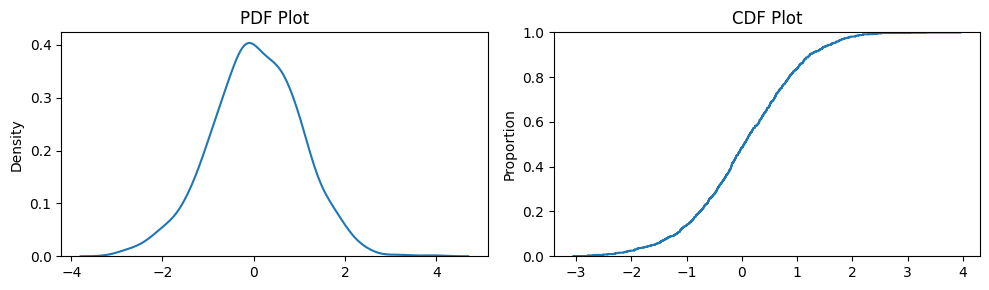

In [ ]:
from scipy.stats import norm

values = norm.rvs(size=1000, random_state=1)
print(values[0:10])

fig, ax = plt.subplots(1,2,figsize=(10,3))

sns.kdeplot(values,ax=ax[0])
ax[0].set_title('PDF Plot')
sns.ecdfplot(values,ax=ax[1])
ax[1].set_title('CDF Plot')

plt.tight_layout()
plt.show()

[ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.3015387
  1.74481176 -0.7612069   0.3190391  -0.24937038]


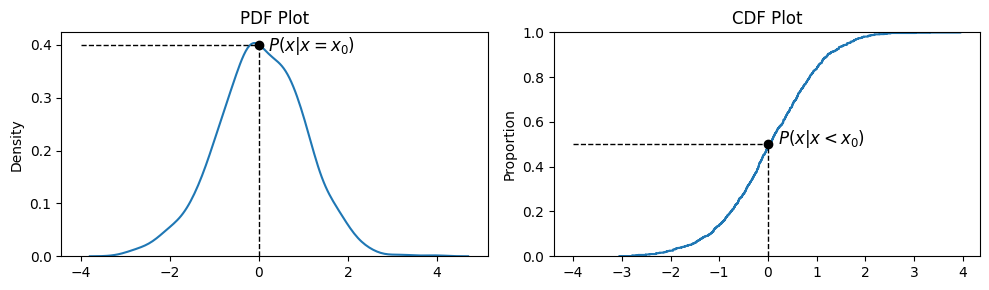

In [ ]:


from scipy.stats import norm

values = norm.rvs(size=1000, random_state=1)
print(values[0:10])

fig, ax = plt.subplots(1,2,figsize=(10,3))

sns.kdeplot(values,ax=ax[0])
ax[0].vlines(0,0,norm.pdf(0),linestyle='--',color='k',lw=1)
ax[0].hlines(norm.pdf(0),-4,0,linestyle='--',color='k',lw=1)
ax[0].plot(0,norm.pdf(0),'ko')

ax[0].text(0+0.2,norm.pdf(0)-.01,'$P(x | x = x_0)$',fontsize=12)

ax[0].set_title('PDF Plot')

sns.ecdfplot(values,ax=ax[1])
ax[1].vlines(0,0,norm.cdf(0),linestyle='--',color='k',lw=1)
ax[1].hlines(norm.cdf(0),-4,0,linestyle='--',color='k',lw=1)
ax[1].plot(0,norm.cdf(0),'ko')

ax[1].text(0+0.2,norm.cdf(0),'$P(x | x < x_0)$',fontsize=12)

ax[1].set_title('CDF Plot')

plt.tight_layout()
plt.show()

## `pdf(x, loc=0, scale=1)`, $P(x=x_0)$

Obtém a *probabilidade* para um ponto específico. De fato, pouca aplicabilidade prática já que um ponto em uma probabilidade de valores contínuos tem probabilidade 0.

In [ ]:
norm.pdf(0) # probability distribution function

0.3989422804014327

## `cdf(x, loc=0, scale=1)`, $P(x | x\le x_0)$


In [ ]:
norm.cdf(0) # cummulative distribution function

0.5

## `ppf(x, loc=0, scale=1)`, $x_0 | P(x|x\le x_0) = p$

É o inverso da `cdf`.

In [ ]:
norm.ppf(0.5) # percent point function

0.0

## Exemplo

Uma fábrica produz HDs SSD com uma vida útil de 5 anos. Sabe-se que o desvio padrão da durabilidade desses HDs é de 5 meses.




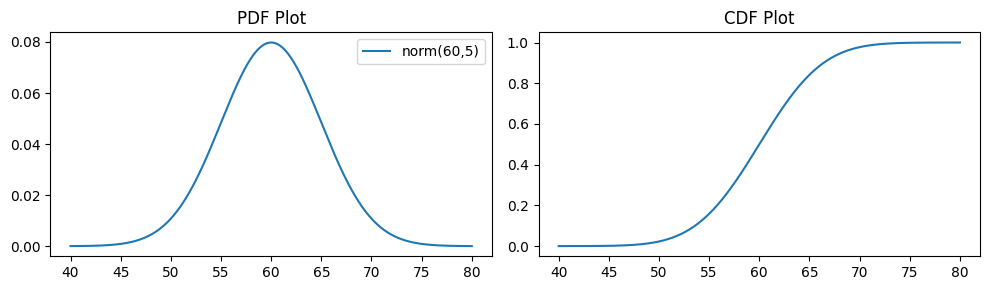

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,3))

mu = 5*12
sigma = 5
values_norm = []
points = np.linspace(mu - 4*sigma, mu + 4*sigma,1000)

for v in points:
    values_norm.append(norm.pdf(v,loc=mu,scale=sigma))

values_norm = np.array(values_norm)

sns.lineplot(x=points, y=values_norm, ax=ax[0], label='norm(' + str(mu) + ',' + str(sigma) + ')')
ax[0].set_title('PDF Plot')
ax[0].legend()

values_cdf = []

for v in points:
    values_cdf.append(norm.cdf(v,loc=mu,scale=sigma))

values_cdf = np.array(values_cdf)

sns.lineplot(x=points, y=values_cdf,ax=ax[1])
ax[1].set_title('CDF Plot')

plt.tight_layout()
plt.show()

Estime o número de HDs que precisarão ser trocados após 48 meses.

In [ ]:
norm.cdf(48,loc=mu,scale=sigma) * 1000

8.197535924596131

Você faz uma reserva técnicas comprando 10% de HDs para trocas. Essa reserva deve garantir quantos meses de trocas?

In [ ]:
norm.ppf(0.10,loc=mu,scale=sigma)

53.592242172277

## Exemplo

Você compra mil sacas de café de 60Kg. O fornecedor garante um desvio padrão de 200g por saca. Qual a chance de você obter em 100 sacas uma saca com menos de 59.5Kg?




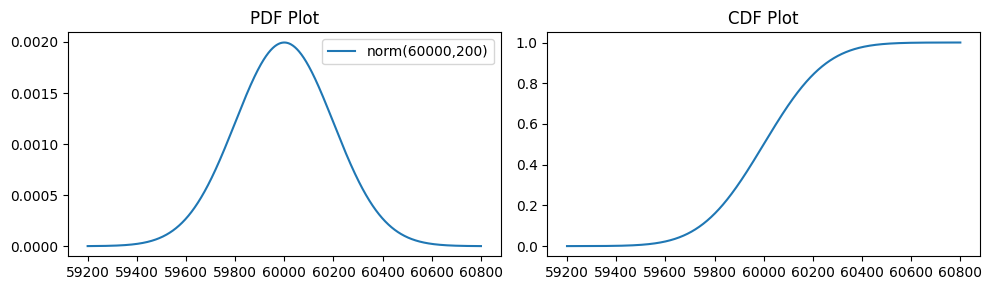

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,3))

mu = 60000    # Evite mu = 60, sigma = 0.2 para o PDF
sigma = 200
values_norm = []
points = np.linspace(mu - 4*sigma, mu + 4*sigma,1000)

for v in points:
    values_norm.append(norm.pdf(v,loc=mu,scale=sigma))

values_norm = np.array(values_norm)

sns.lineplot(x=points, y=values_norm, ax=ax[0], label='norm(' + str(mu) + ',' + str(sigma) + ')')
ax[0].set_title('PDF Plot')
ax[0].legend()

values_cdf = []

for v in points:
    values_cdf.append(norm.cdf(v,loc=mu,scale=sigma))

values_cdf = np.array(values_cdf)

sns.lineplot(x=points, y=values_cdf,ax=ax[1])
ax[1].set_title('CDF Plot')

plt.tight_layout()
plt.show()

Qual a probabilidade de você obter sacas com peso abaixo ou acima de 2 e 3 vezes o desvio padrão?

In [ ]:
2 * norm.cdf(60000 - 2*200, loc=60000, scale=200)

0.04550026389635839

In [ ]:
2 * norm.cdf(60000 - 3*200, loc=60000, scale=200)

0.0026997960632601866

Você encontrou em uma amostra das 100 sacas adquiridas 2 sacas pouco abaixo de 59.6 Kg. Você pode considerar que a informação do fornecedor é confiável? **Ainda, sim.**

In [ ]:
norm.ppf(0.02,loc=60000,scale=200)

59589.25021787363

Sendo verdadeira a informação do fornecedor, qual o intervalo de peso que você deve encontrar em 95% das amostras?

In [ ]:
norm.ppf(1 - 0.025,loc=60000,scale=200)

60391.99279690801

In [ ]:
norm.ppf(0.025,loc=60000,scale=200)

59608.00720309199

## Intervalo de Confiança, `interval(confidence, loc=0, scale=1)`

In [ ]:
norm.interval(0.95, loc=60000, scale=200)

(59608.00720309199, 60391.99279690801)

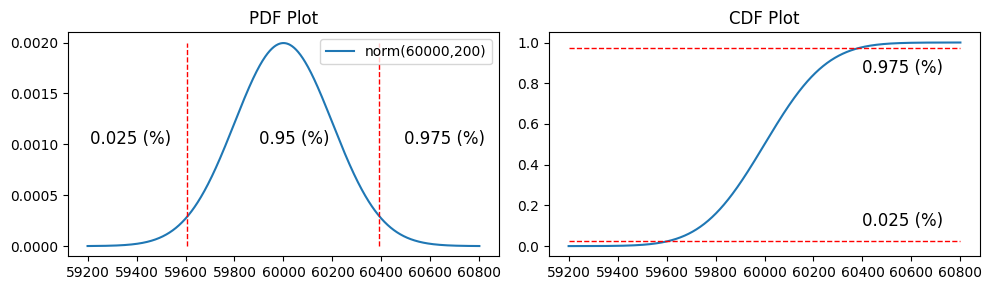

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,3))

mu = 60000
sigma = 200
values_norm = []
points = np.linspace(mu - 4*sigma, mu + 4*sigma,1000)

for v in points:
    values_norm.append(norm.pdf(v,loc=mu,scale=sigma))

values_norm = np.array(values_norm)

sns.lineplot(x=points, y=values_norm, ax=ax[0], label='norm(' + str(mu) + ',' + str(sigma) + ')')

ax[0].vlines(norm.interval(0.95, loc=60000, scale=200)[0],0,0.002,color='r',linestyle='--',lw=1)
ax[0].vlines(norm.interval(0.95, loc=60000, scale=200)[1],0,0.002,color='r',linestyle='--',lw=1)

ax[0].set_title('PDF Plot')
ax[0].text(60000-100,0.001,'0.95 (%)',fontsize=12)

ax[0].text(norm.interval(0.95, loc=60000, scale=200)[0]-400,0.001,'0.025 (%)',fontsize=12)
ax[0].text(norm.interval(0.95, loc=60000, scale=200)[1]+100,0.001,'0.975 (%)',fontsize=12)

ax[0].legend()

values_cdf = []

for v in points:
    values_cdf.append(norm.cdf(v,loc=mu,scale=sigma))

values_cdf = np.array(values_cdf)

sns.lineplot(x=points, y=values_cdf,ax=ax[1])
ax[1].hlines(0.975, 60000-4*200,60000+4*200,color='r',linestyle='--',lw=1)
ax[1].hlines(0.025,60000-4*200,60000+4*200,color='r',linestyle='--',lw=1)

ax[1].text(60400,0.1,'0.025 (%)',fontsize=12)
ax[1].text(60400,0.85,'0.975 (%)',fontsize=12)

ax[1].set_title('CDF Plot')

plt.tight_layout()
plt.show()

## Minha distribuição é normal? qqplot, `stats.probplot()`

Apesar de haverem testes sobre normalidade a inspeção visual é frequentemente empregada com o uso de gráficos qqplot. Já vimos isso quando estudamos distribuições.

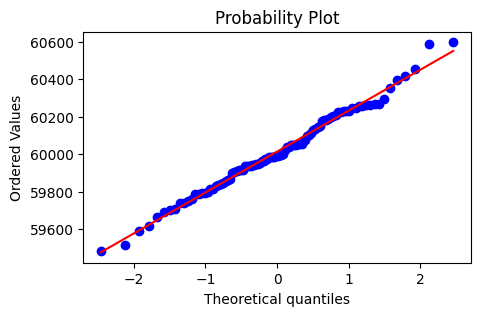

In [ ]:
from scipy.stats import probplot

fig, ax = plt.subplots(1,1)

values = norm.rvs(loc=60000, scale=200, size=100)
stats.probplot(values, dist='norm', fit=True, plot=ax)
plt.show()

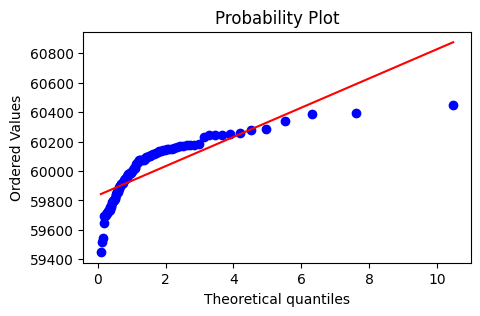

In [ ]:
from scipy.stats import probplot
from scipy.stats import lognorm

fig, ax = plt.subplots(1,1)

values = norm.rvs(loc=60000, scale=200, size=100)
stats.probplot(values, dist=stats.lognorm(0.954), fit=True, plot=ax)
plt.show()

# Outras distribuições


[SciPy Stats](https://docs.scipy.org/doc/scipy/tutorial/stats.html)



## Lognorm

[4.70970596 0.55787764 0.60418439 0.3592948  2.28324774 0.11128421
 5.28329747 0.4837479  1.35576151 0.78828204]


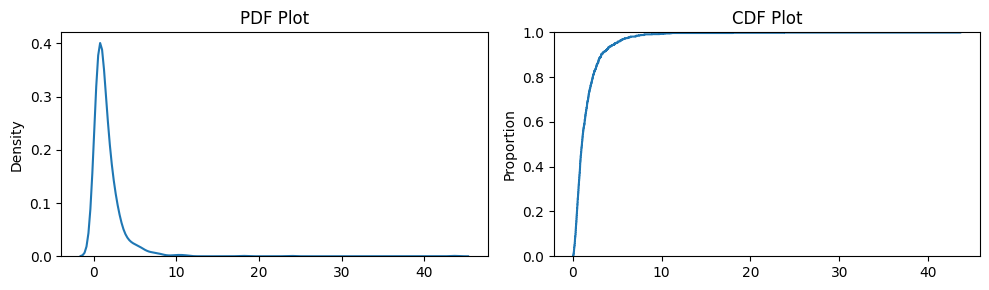

In [ ]:
from scipy.stats import lognorm

rv = lognorm(0.954)
values = rv.rvs(size=1000, random_state=1)
print(values[0:10])

fig, ax = plt.subplots(1,2,figsize=(10,3))

sns.kdeplot(values,ax=ax[0])
ax[0].set_title('PDF Plot')
sns.ecdfplot(values,ax=ax[1])
ax[1].set_title('CDF Plot')

plt.tight_layout()
plt.show()

## gamma

[4.75021203 0.98742605 1.06559722 0.62384076 5.07008018 0.85735877
 4.34109604 0.16815469 3.58637333 0.60594455]


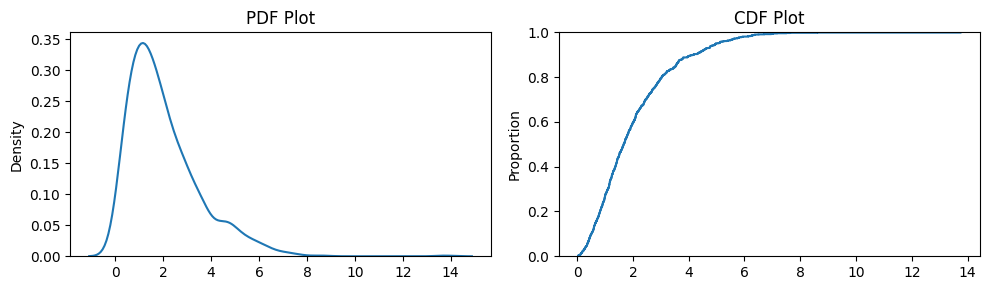

In [ ]:
from scipy.stats import gamma

rv = gamma(1.99)
values = rv.rvs(size=1000, random_state=1)
print(values[0:10])

fig, ax = plt.subplots(1,2,figsize=(10,3))

sns.kdeplot(values,ax=ax[0])
ax[0].set_title('PDF Plot')
sns.ecdfplot(values,ax=ax[1])
ax[1].set_title('CDF Plot')

plt.tight_layout()
plt.show()

## expon

[1.03960584 1.77412525 0.50011438 0.86001275 0.6587096  0.59688387
 0.70611463 0.92397648 1.00545254 1.27395977]


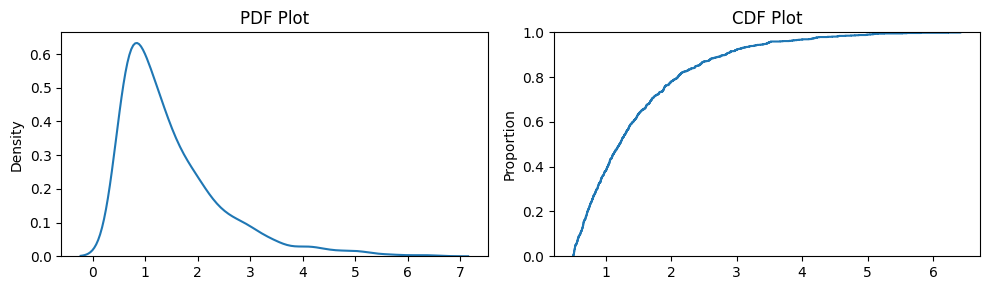

In [ ]:
from scipy.stats import expon

rv = expon(1/2)
values = rv.rvs(size=1000, random_state=1)
print(values[0:10])

fig, ax = plt.subplots(1,2,figsize=(10,3))

sns.kdeplot(values,ax=ax[0])
ax[0].set_title('PDF Plot')
sns.ecdfplot(values,ax=ax[1])
ax[1].set_title('CDF Plot')

plt.tight_layout()
plt.show()

## t-student

Uma distribuição importante usada quando esperamos uma distribuição normal, mas não temos a população, apenas uma amostra dos dados.

[ 2.61103204 -1.17044637 -1.16204805 -1.69123532  0.41674013 -0.49759053
 -0.45341236  0.70598317 -0.32951745  1.88563226]


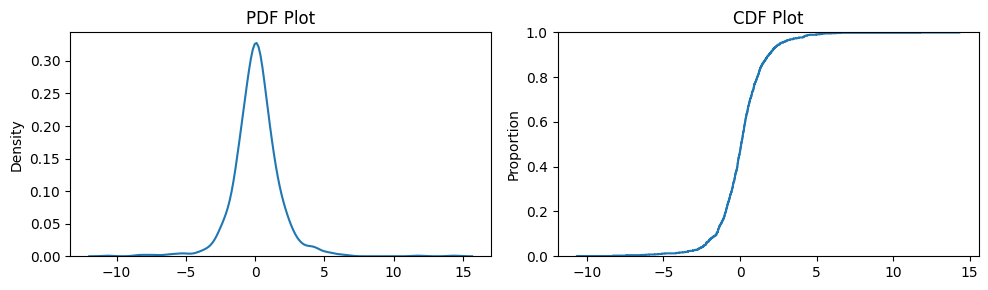

In [ ]:
from scipy.stats import t

rv = t(2.74)
values = rv.rvs(size=1000, random_state=1)
print(values[0:10])

fig, ax = plt.subplots(1,2,figsize=(10,3))

sns.kdeplot(values,ax=ax[0])
ax[0].set_title('PDF Plot')
sns.ecdfplot(values,ax=ax[1])
ax[1].set_title('CDF Plot')

plt.tight_layout()
plt.show()

Para todas valem as funções,

## `rv.rvs()`
## `rv.pdf()`  
## `rv.cdf()`
## `rv.ppf()`

Embora, cada uma, tenha os seus parâmetros específicos. Para distribuições discretas, troque `pdf` por `pmf`, e assim por diante.

# Avançado: Obtendo um CDF a partir de uma PDF arbitrária

From: Jee Vang, **Data Science Topics** (2023). [Acess](https://datascience.oneoffcoder.com/index.html)

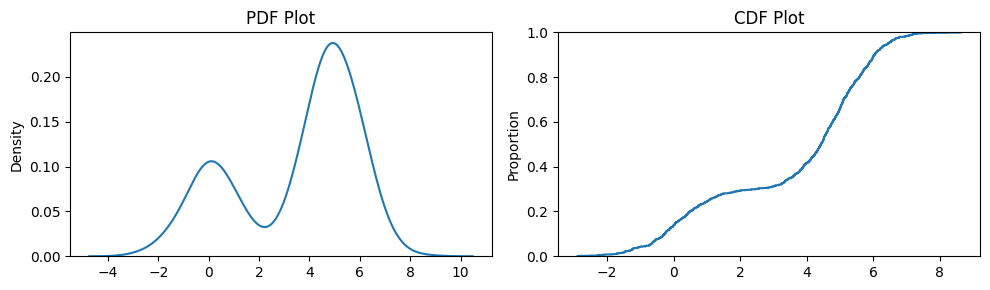

In [ ]:
X = np.concatenate((norm.rvs(0,1,300), np.array(norm.rvs(5,1,700))))

values = pd.Series(X)

fig, ax = plt.subplots(1,2,figsize=(10,3))

sns.kdeplot(values,ax=ax[0])
ax[0].set_title('PDF Plot')
sns.ecdfplot(values,ax=ax[1])
ax[1].set_title('CDF Plot')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.neighbors import KernelDensity
from scipy.misc import derivative
from scipy.integrate import quad

kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(X[:, np.newaxis])
gmm_pdf = lambda x: np.exp(kde.score(np.array([x]).reshape(-1, 1)))

x = np.arange(-5, 10.1, 0.1)
y_cdf = np.array([tup[0] for tup in [quad(gmm_pdf, a, b) for a, b in [(a, b) for a, b in zip(x, x[1:len(x)])]]] + [0]).cumsum()


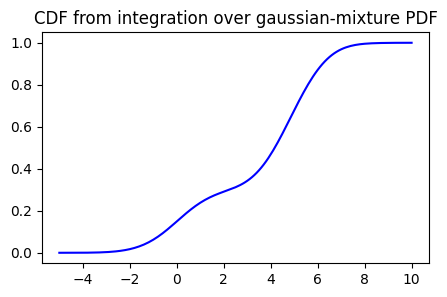

In [ ]:
fig, ax = plt.subplots()

ax.plot(x, y_cdf, color='b')
ax.set_title('CDF from integration over gaussian-mixture PDF')

plt.show()

In [ ]:
cdf = pd.DataFrame()
cdf['value'] = x
cdf['prob'] = y_cdf

cdf.head()

,value,prob
0,-5.0,0.000003
1,-4.9,0.000007
2,-4.8,0.000013
3,-4.7,0.000022
4,-4.6,0.000034


In [ ]:
cdf[ (cdf.value >=2.9) & (cdf.value <= 3) ]

,value,prob
80,3.0,0.342524


In [ ]:
cdf[ (cdf.prob <= 0.36) ].tail()

,value,prob
78,2.8,0.328491
79,2.9,0.335148
80,3.0,0.342524
81,3.1,0.350695
82,3.2,0.359734


# Intervalo de Confiança (IC) para a média uma população e uma amostra

Quando temos dados de **uma população**, podemos calcular a média e o desvio padrão exatos. A fórmula para o IC da média da população pode ser então calculado como:

$$ IC = \mu \pm Z_{\alpha/2} \cdot \left(\frac{\sigma}{\sqrt{n}}\right) $$
onde:
- $\mu$ é a média da população.
- $Z_{\alpha/2}$ é o valor crítico da distribuição normal (para um nível de confiança $(1-\alpha)$.
- $\sigma$ é o desvio padrão da população.
- $n$ é o tamanho da população.

Para **uma amostra** fazemos uma aproximação pela distribuição de t-student.

$$ IC = \bar{x} \pm t_{\alpha/2, n-1} \cdot \left(\frac{s}{\sqrt{n}}\right) $$
onde:
- $\bar{x}$ é a média da população.
- $t_{\alpha/2, n-1}$ é o valor crítico da distribuição t de Student (para um nível de confiança $(1-\alpha)$ e $n-1$ graus de liberdade).  
- $s$ é o desvio padrão da amostra.
- $n$ é o tamanho da população.

Na prática, para $n \ge 30$ ambos são valores muito próximos.





Grau de liberdade: em geral, $n-1$, estimada a média de $n$ elementos, se calculamos a média de $n-1$ elementos, o valor do próximo elemento está definido!

## Outras distribuições: Bootstraping e Resampling

Resampling são técnicas de reamostragem e podem envolver redução do tamanho da amostra e diferentes formas de seleção dos dados (pode exemplo o *cross-validation* ou *k-fold*). O Bootstraping é uma técnica específica de reamostragem onde a amostragem é feita com reposição. Ambas podem ser técnicas úteis para estimar médias e IC para distribuições desconhecidas.

In [11]:
dados = np.array([2.3, 2.1, 3.5, 2.8, 3.3, 3.0, 2.7])
# dados = np.random.normal(size=1000) # Tente esse agora

n = len(dados)
media_amostra = np.mean(dados)
desvio_padrao_amostra = np.std(dados, ddof=1)
nivel_confianca = 0.95

# População
z_critico = stats.norm.ppf((1 + nivel_confianca) / 2)

margem_erro = z_critico * (desvio_padrao_amostra / np.sqrt(n))

IC_inferior = media_amostra - margem_erro
IC_superior = media_amostra + margem_erro
print(f"IC para a população: ({IC_inferior:.2f}, {IC_superior:.2f}), Intervalo = ({IC_superior - IC_inferior:.2f})")

# Amostra
t_critico = stats.t.ppf((1 + nivel_confianca) / 2, df=n-1)

margem_erro = t_critico * (desvio_padrao_amostra / np.sqrt(n))

IC_inferior = media_amostra - margem_erro
IC_superior = media_amostra + margem_erro
print(f"IC para a amostra  : ({IC_inferior:.2f}, {IC_superior:.2f}), Intervalo = ({IC_superior - IC_inferior:.2f})")


IC para a população: (2.44, 3.19), Intervalo = (0.75)
IC para a amostra  : (2.35, 3.28), Intervalo = (0.93)


IC Bootstrap: (-0.10, 0.02, Intervalo = (0.12)


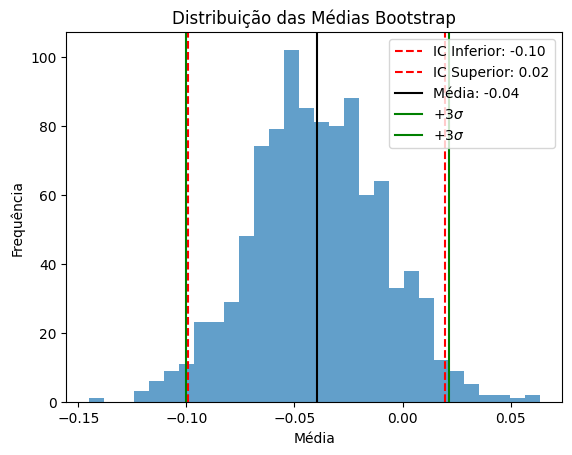

In [30]:
dados = np.array([2.3, 2.1, 3.5, 2.8, 3.3, 3.0, 2.7])
dados = np.random.normal(size=1000) # Tente esse agora

# Parâmetros do Bootstrap
n_bootstraps = 1000
medias_bootstrap = []

np.random.seed(0)
for _ in range(n_bootstraps):
    amostra = np.random.choice(dados, size=len(dados), replace=True)      # Bootstrap, Cada dado pode ser selecionado várias vezes em cada amostra.
    # amostra = np.random.choice(dados, size=int(1/3*len(dados)), replace=False)   # Resample, Cada dado pode ser selecionado uma única vez em cada amostra. Não funciona aqui para a amostra pequena.
    medias_bootstrap.append(np.mean(amostra))

IC_inferior = np.percentile(medias_bootstrap, 2.5)
IC_superior = np.percentile(medias_bootstrap, 97.5)

print(f"IC Bootstrap: ({IC_inferior:.2f}, {IC_superior:.2f}, Intervalo = ({IC_superior - IC_inferior:.2f})")

plt.hist(medias_bootstrap, bins=30, alpha=0.7)
plt.axvline(IC_inferior, color='r', linestyle='--', label=f'IC Inferior: {IC_inferior:.2f}')
plt.axvline(IC_superior, color='r', linestyle='--', label=f'IC Superior: {IC_superior:.2f}')
plt.axvline(np.mean(medias_bootstrap), color='k', linestyle='-', label=f'Média: {np.mean(medias_bootstrap):.2f}')

# plt.axvline(np.mean(medias_bootstrap)-2*np.std(medias_bootstrap), color='g', linestyle='-', label='$+2 \\sigma$')
# plt.axvline(np.mean(medias_bootstrap)+2*np.std(medias_bootstrap), color='g', linestyle='-', label='$+2 \\sigma$')

plt.legend()
plt.title('Distribuição das Médias Bootstrap')
plt.xlabel('Média')
plt.ylabel('Frequência')
plt.show()


# Testes Estatísticos: Testes de Hipótese ou de Significância

**Hipótese Estatística:** Uma hipótese estatística é geralmente uma afirmação sobre um conjunto de parâmetros de uma distribuição populacional.

<br>

* **$H_0$ (Hipótese Nula):** A hipótese nula é uma hipótese estatística a ser testada e aceita ou rejeitada em favor de uma alternativa.

* **$H_1$ (Hipótese Alternativa):** Uma hipótese alternativa é uma teoria oposta em relação à hipótese nula.

<br>

**Erro de tipo $\mathrm{I}$:** Diz-se que o erro de tipo $\mathrm{I}$ ocorre se o teste solicitar incorretamente a rejeição de $H_0$ quando estiver realmente correto.

$\alpha = P(reject \ H_0\ |\ H_0\ is\ true)$

**Erro de tipo $\mathrm{II}$:** O erro de tipo $\mathrm{II}$ ocorre se o teste solicitar a aceitação de $H_0$ quando for falso.

$\beta = P(Accept \ H_0\ |\ H_0\ is \ not \ true)$

<br>

**Nível de significância:** Sempre que $H_0$ for verdadeiro, sua probabilidade de ser rejeitado nunca é maior que $\alpha$. O valor $\alpha$, chamado de nível de significância do teste, geralmente é definido antecipadamente, sendo os valores comumente escolhidos $\alpha = 0,1, 0,05, 0,005$.

<br>

**P_value:** O valor P, ou probabilidade calculada, é a probabilidade de encontrar os resultados observados, ou mais extremos, quando a hipótese nula (H 0) de uma questão de estudo é verdadeira - a definição de 'extremo' depende de como a hipótese está sendo testada.

Se o seu valor P for menor que o nível de significância escolhido, então você rejeita a hipótese nula, ou seja, aceita que sua amostra fornece evidências razoáveis para apoiar a hipótese alternativa.




## Teste Bi-lateral (Bi-caudal)

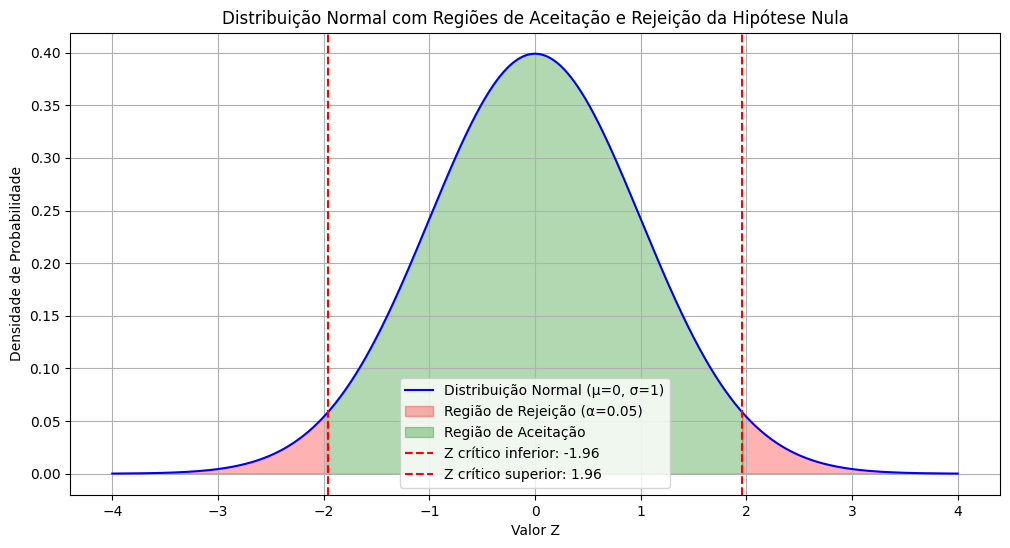

In [31]:
media = 0
desvio_padrao = 1

# Valor crítico para alpha = 0.05 (95% de confiança)
alpha = 0.05
z_critico_inferior = stats.norm.ppf(alpha / 2)
z_critico_superior = stats.norm.ppf(1 - alpha / 2)

x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x, media, desvio_padrao)


plt.figure(figsize=(12, 6))
plt.plot(x, y, label='Distribuição Normal (μ=0, σ=1)', color='blue')
plt.fill_between(x, y, where=(x <= z_critico_inferior) | (x >= z_critico_superior), color='red', alpha=0.3, label='Região de Rejeição (α=0.05)')
plt.fill_between(x, y, where=(x > z_critico_inferior) & (x < z_critico_superior), color='green', alpha=0.3, label='Região de Aceitação')
plt.axvline(z_critico_inferior, color='red', linestyle='--', label=f'Z crítico inferior: {z_critico_inferior:.2f}')
plt.axvline(z_critico_superior, color='red', linestyle='--', label=f'Z crítico superior: {z_critico_superior:.2f}')

plt.title('Distribuição Normal com Regiões de Aceitação e Rejeição da Hipótese Nula')
plt.xlabel('Valor Z')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.grid(True)
plt.show()


## Teste-Unilateral (Uni-caudal)

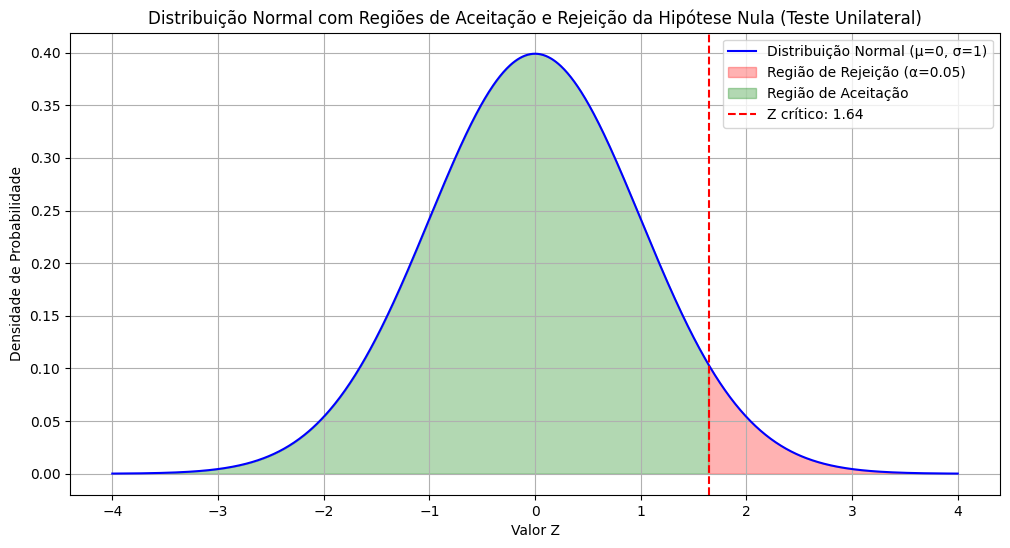

In [32]:
media = 0
desvio_padrao = 1

# Valor crítico para alpha = 0.05 (unilateral à direita)
alpha = 0.05
z_critico = stats.norm.ppf(1 - alpha)

x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x, media, desvio_padrao)

plt.figure(figsize=(12, 6))
plt.plot(x, y, label='Distribuição Normal (μ=0, σ=1)', color='blue')
plt.fill_between(x, y, where=(x >= z_critico), color='red', alpha=0.3, label='Região de Rejeição (α=0.05)')
plt.fill_between(x, y, where=(x < z_critico), color='green', alpha=0.3, label='Região de Aceitação')
plt.axvline(z_critico, color='red', linestyle='--', label=f'Z crítico: {z_critico:.2f}')

plt.title('Distribuição Normal com Regiões de Aceitação e Rejeição da Hipótese Nula (Teste Unilateral)')
plt.xlabel('Valor Z')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.grid(True)
plt.show()


# Exemplo

Vamos considera que você tem dados de homens e mulheres e deseja testar hipóteses sobre a média de idade de homens e mulheres.




In [33]:
media_homens = 35
media_mulheres = 30
desvio_padrao_homens = 5
desvio_padrao_mulheres = 4
tamanho_amostra = 50

amostra_homens = np.random.normal(media_homens, desvio_padrao_homens, tamanho_amostra)
amostra_mulheres = np.random.normal(media_mulheres, desvio_padrao_mulheres, tamanho_amostra)


In [42]:
t_stat, p_valor = stats.ttest_ind(amostra_homens, amostra_mulheres)
z_stat, p_valor = stats.ztest(amostra_homens, amostra_mulheres, value=0)

print("Estatística t:", t_stat)
print("Estatística t:", z_stat)
print("Valor p:", p_valor)
print()

if p_valor < 0.05:
    print("Rejeita a hipótese nula - as médias são estatisticamente diferentes.")
else:
    print("Não rejeita a hipótese nula - não há evidências para afirmar diferença das médias.")

AttributeError: module 'scipy.stats' has no attribute 'ztest'

In [40]:
t_stat, p_valor = stats.ttest_ind(amostra_homens, amostra_mulheres, alternative='greater')

print("Estatística t:", t_stat)
print("Valor p:", p_valor)
print()

if p_valor < 0.05:
    print("Rejeita a hipótese nula - a média das idades dos homens é estatisticamente maior.")
else:
    print("Não rejeita a hipótese nula - não há evidências para afirmar que a média de idade dos homens é maior.")


Estatística t: 6.357113786804457
Valor p: 3.265684375150073e-09

Rejeita a hipótese nula - a média das idades dos homens é estatisticamente maior.


# Diferentes Testes Estatísticos

| Teste Estatístico               | Situação                                          | Tipo dos Dados | Paramétrico/ Não Paramétrico | Distribuição dos Dados        |
|--------------------------------|---------------------------------------------------|----------------|-------------------------------|-------------------------------|
| Teste t (unpaired)             | Comparar média de duas amostras independentes     | Numérico       | Paramétrico                   | Normal ou aproximadamente normal |
| Teste t (paired)               | Comparar média de duas amostras pareadas          | Numérico       | Paramétrico                   | Normal ou aproximadamente normal |
| Teste z                         | Comparar proporção de uma amostra com um valor conhecido | Numérico    | Paramétrico                   | Aproximação normal (n > 30)  |
| ANOVA                          | Comparar média de três ou mais grupos independentes | Numérico       | Paramétrico                   | Normal ou aproximadamente normal |
| ANOVA de Medidas Repetidas     | Comparar médias em várias ocasiões                | Numérico       | Paramétrico                   | Normal ou aproximadamente normal |
| Teste de Wilcoxon (Mann-Whitney U) | Comparar medianas de duas amostras independentes | Numérico       | Não Paramétrico               | Não normal ou distribuição desconhecida |
| Teste de Wilcoxon Signed-Rank  | Comparar medianas de duas amostras pareadas       | Numérico       | Não Paramétrico               | Não normal ou distribuição desconhecida |
| Teste de Kruskal-Wallis        | Comparar medianas de três ou mais grupos independentes | Numérico       | Não Paramétrico               | Não normal ou distribuição desconhecida |
| Qui-quadrado                    | Testar independência entre duas variáveis categóricas | Categórico     | Não Paramétrico               | Não normal ou distribuição desconhecida |
| Teste de Dependência (ex: Correlação de Pearson) | Testar dependência entre duas variáveis numéricas | Numérico | Paramétrico                   | Normal ou aproximadamente normal |
| Teste de Friedman              | Comparar médias de três ou mais grupos pareados   | Numérico       | Não Paramétrico               | Não normal ou distribuição desconhecida |
| Teste de Fisher (ANOVA Multivariada) | Comparar média de três ou mais grupos independentes (MANOVA) | Numérico | Paramétrico                   | Normal ou aproximadamente normal |
| Teste de Welch (t)              | Comparar média de duas amostras independentes     | Numérico       | Paramétrico                   | Normal ou aproximadamente normal |
